In [124]:
import time

from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn import neighbors
import pandas as pd
from pyproj import Transformer

In [125]:
geolocator = Nominatim(user_agent="DWL Project")

In [126]:
locations = ['Kaiserslautern, Germany',
             'Amsterdam, Netherlands',
             'London, United Kingdom',
             'Exeter, United Kingdom',
             'Barcelona, Spain',
            ]

coordinates = []
for loc in locations:
    location = geolocator.geocode(loc)
    print(location.address)
    coordinates.append((location.address, location.latitude, location.longitude))
    time.sleep(2)

Kaiserslautern, Rheinland-Pfalz, Deutschland
Amsterdam, Noord-Holland, Nederland
London, Greater London, England, SW1A 2DX, United Kingdom
Exeter, Devon, South West England, England, EX1 1GB, United Kingdom
Barcelona, Barcelonès, Barcelona, Catalunya, 08001, España


In [127]:
df = pd.DataFrame(coordinates, columns=['address', 'lat', 'lon'])
df['target'] = None
for i in range(len(df)):
    df.loc[i, 'target'] = i
df

,address,lat,lon,target
0,"Kaiserslautern, Rheinland-Pfalz, Deutschland",49.443217,7.768995,0
1,"Amsterdam, Noord-Holland, Nederland",52.372760,4.893604,1
2,"London, Greater London, England, SW1A 2DX, Uni...",51.507322,-0.127647,2
3,"Exeter, Devon, South West England, England, EX...",50.725579,-3.526950,3
4,"Barcelona, Barcelonès, Barcelona, Catalunya, 0...",41.382894,2.177432,4


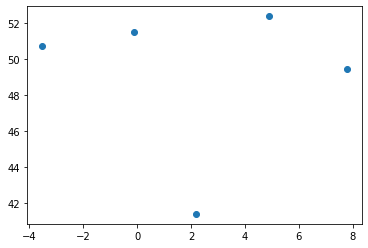

In [128]:
plt.scatter(x=df['lon'], y=df['lat'])
plt.show()

In [129]:
def transform_crs(lat, lon, from_crs = 'epsg:4326', to_crs = 'epsg:3857'):
    transformer = Transformer.from_crs(from_crs, to_crs)
    x_new, y_new = transformer.transform(lat, lon)
    return x_new, y_new

In [130]:
df['x'] = None
df['y'] = None
for loc in df.iterrows():
    x_new, y_new = transform_crs(loc[1]['lat'], loc[1]['lon'])
    df.loc[loc[0], 'x'] = x_new
    df.loc[loc[0], 'y'] = y_new

/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-o40nAfHA/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


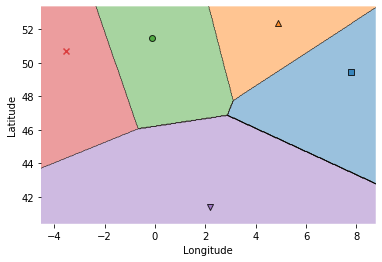

In [131]:
x = df[['lon', 'lat']].values.astype(float)
y = df['target'].astype(int).values
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(x, y)
plot_decision_regions(x, y, clf=clf, legend=0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

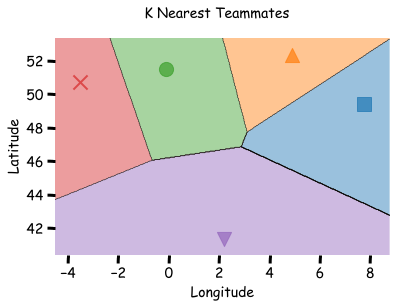

In [132]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()

    x = df[['lon', 'lat']].values.astype(float)
    y = df['target'].astype(int).values
    scatter_kwargs = {'s': 200, 'edgecolor': None, 'alpha': 0.7}
    plot_decision_regions(x, y, clf=clf, scatter_kwargs=scatter_kwargs, legend=0)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.annotate('Teammate0', (x[0][0], x[0][1]), arrowprops=dict(arrowstyle='->'), xytext=(x[0][0]-2, x[0][1]-2))
    # plt.annotate('Teammate1', (x[1][0], x[1][1]), arrowprops=dict(arrowstyle='->'), xytext=(x[1][0]-2, x[1][1]-2))
    # plt.annotate('Teammate2', (x[2][0], x[2][1]), arrowprops=dict(arrowstyle='->'), xytext=(x[2][0], x[2][1]-2.5))
    # plt.annotate('Teammate3', (x[3][0], x[3][1]), arrowprops=dict(arrowstyle='->'), xytext=(x[3][0], x[3][1]-2.5))
    # plt.annotate('Teammate4', (x[4][0], x[4][1]), arrowprops=dict(arrowstyle='->'), xytext=(x[4][0], x[4][1]+2))
    fig.text(
        0.5, 0.95,
        'K Nearest Teammates',
        ha='center')